# Predict student performance

### load the data

In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('student-por.csv', sep=';')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [64]:
df.isnull().sum() # there's no missing data, good

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


In [66]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Feature engineering

In [82]:
df['pass'] = df.apply(lambda x: 1 if (x['G1']+x['G2']+x['G3'])>=35 else 0, axis=1)

In [ ]:
# another way to create the pass column

In [87]:
def func(col):
    G1=col[0]
    G2=col[1]
    G3=col[2]
    rlt = G1+G2+G3
    if rlt >= 35:
        return 1
    else:
        return 0

In [89]:
df[['G1', 'G2', 'G3']].apply(func, axis=1)

0      0
1      0
2      1
3      1
4      1
      ..
644    0
645    1
646    0
647    0
648    0
Length: 649, dtype: int64

In [90]:
df = df.drop(['G1', 'G2','G3'], axis=1)

In [95]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [103]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'pass'],
      dtype='object')

In [104]:
import numpy as np

In [121]:
df = pd.get_dummies(df, columns = df.select_dtypes(exclude=np.number).columns)

In [123]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


### split the training and testing data

In [149]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

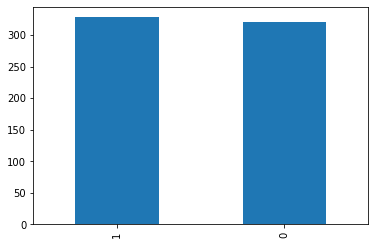

In [136]:
df['pass'].value_counts().plot(kind='bar'); # the target column is well-balanced

In [138]:
X = df.drop('pass', axis=1).copy()
y = df['pass']

In [142]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=101)

### build the model and train the model

In [146]:
tree = DecisionTreeClassifier(max_depth=5, criterion='entropy')

In [147]:
tree.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

### plot the decision tree

In [153]:
export_graphviz(tree, out_file='tree.dot', class_names=['fail', 'pass'], feature_names=Xtrain.columns,filled=True, rounded=True, impurity=False )

In [154]:
file = open('tree.dot', 'r')
graph = file.read()

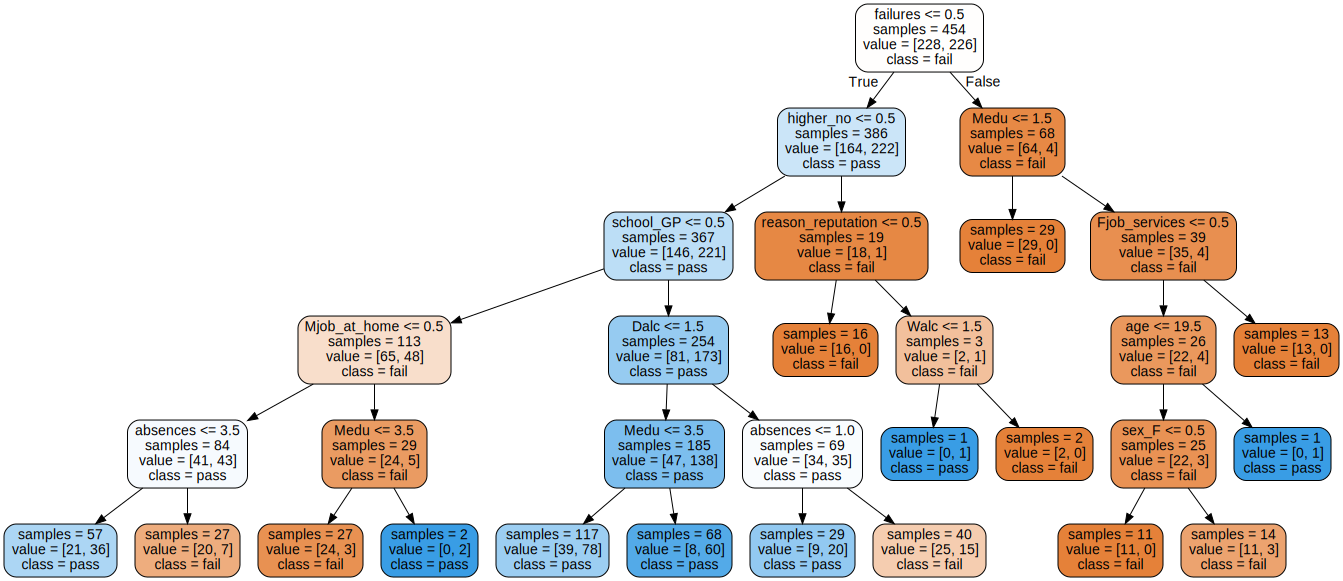

In [155]:
graphviz.Source(graph)

### model evaluation

In [158]:
from sklearn.model_selection import cross_val_score

In [167]:
tree.score(Xtest, ytest) #71% accuracy

0.7128205128205128

In [168]:
scores = cross_val_score(tree, X, y, cv=5)

In [169]:
print('average accuracy: %0.2f (+/- %0.2f})' % (scores.mean(), scores.std()*2))

average accuracy: 0.60 (+/- 0.19})


max_depth:1, avg_acc:0.60 (+/- 0.12)
max_depth:2, avg_acc:0.64 (+/- 0.17)
max_depth:3, avg_acc:0.62 (+/- 0.15)
max_depth:4, avg_acc:0.61 (+/- 0.18)
max_depth:5, avg_acc:0.61 (+/- 0.19)
max_depth:6, avg_acc:0.60 (+/- 0.15)
max_depth:7, avg_acc:0.60 (+/- 0.14)
max_depth:8, avg_acc:0.62 (+/- 0.14)
max_depth:9, avg_acc:0.61 (+/- 0.16)
max_depth:10, avg_acc:0.59 (+/- 0.14)
max_depth:11, avg_acc:0.60 (+/- 0.13)
max_depth:12, avg_acc:0.58 (+/- 0.10)
max_depth:13, avg_acc:0.60 (+/- 0.12)
max_depth:14, avg_acc:0.60 (+/- 0.14)
max_depth:15, avg_acc:0.60 (+/- 0.13)
max_depth:16, avg_acc:0.60 (+/- 0.13)
max_depth:17, avg_acc:0.58 (+/- 0.13)
max_depth:18, avg_acc:0.60 (+/- 0.15)
max_depth:19, avg_acc:0.60 (+/- 0.15)
max_depth:20, avg_acc:0.59 (+/- 0.15)
 


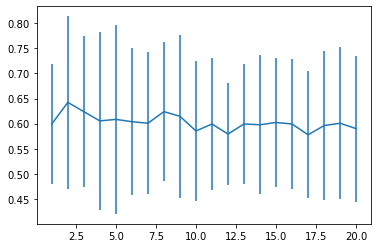

In [181]:
avg_acc = []
std = []
for max_depth in range(1, 21):
    tr = DecisionTreeClassifier(max_depth=max_depth, criterion = 'entropy')
    scores = cross_val_score(tr, X, y, cv=5)
    avg_acc.append(scores.mean())
    std.append(scores.std()*2)
    print('max_depth:%d, avg_acc:%0.2f (+/- %0.2f)' % (max_depth, scores.mean(), scores.std()*2))
print(' ')  
plt.errorbar(range(1,21), avg_acc, std); # Our model shows that having more depth does not necessarily help

# Predicting bird species with random forests

### load the data

In [185]:
bird = pd.read_csv('CUB_200_2011/CUB_200_2011/attributes/image_attribute_labels.txt', sep='\s+', header=None, error_bad_lines=False, warn_bad_lines=False, usecols=[0,1,2], names=['imgid', 'attid', 'present'])

In [187]:
bird.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


In [190]:
bird.shape

(3677856, 3)

In [195]:
imgattr = pd.pivot_table(data=bird, index='imgid', columns='attid', values='present')

In [196]:
imgattr.head()

attid,1,2,3,4,5,6,7,8,9,10,...,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [197]:
imgattr.shape

(11788, 312)

In [204]:
imglabels = pd.read_csv('CUB_200_2011/CUB_200_2011/image_class_labels.txt', header=None, sep=' ', names=['imgid', 'label'])

In [207]:
imglabels = imglabels.set_index('imgid')

In [212]:
imglabels.shape

(11788, 1)

In [213]:
df = imgattr.join(imglabels)

In [217]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,304,305,306,307,308,309,310,311,312,label
imgid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


### train test split

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X = df.drop('label', axis=1).copy()
y = df['label']

In [223]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=101)

### build a random forest model

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [225]:
rf = RandomForestClassifier(max_features = 50, random_state=101, n_estimators=100)

In [226]:
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_features=50, random_state=101)

In [227]:
rf.predict(Xtest)

array([ 63, 132, 195, ...,  31,  78,  86])

In [229]:
rf.score(Xtest, ytest)

0.44076901328809726

In [258]:
birds = pd.read_csv('CUB_200_2011/CUB_200_2011/classes.txt', sep=' ', names=['bird_names'])

In [259]:
birds = birds['bird_names']

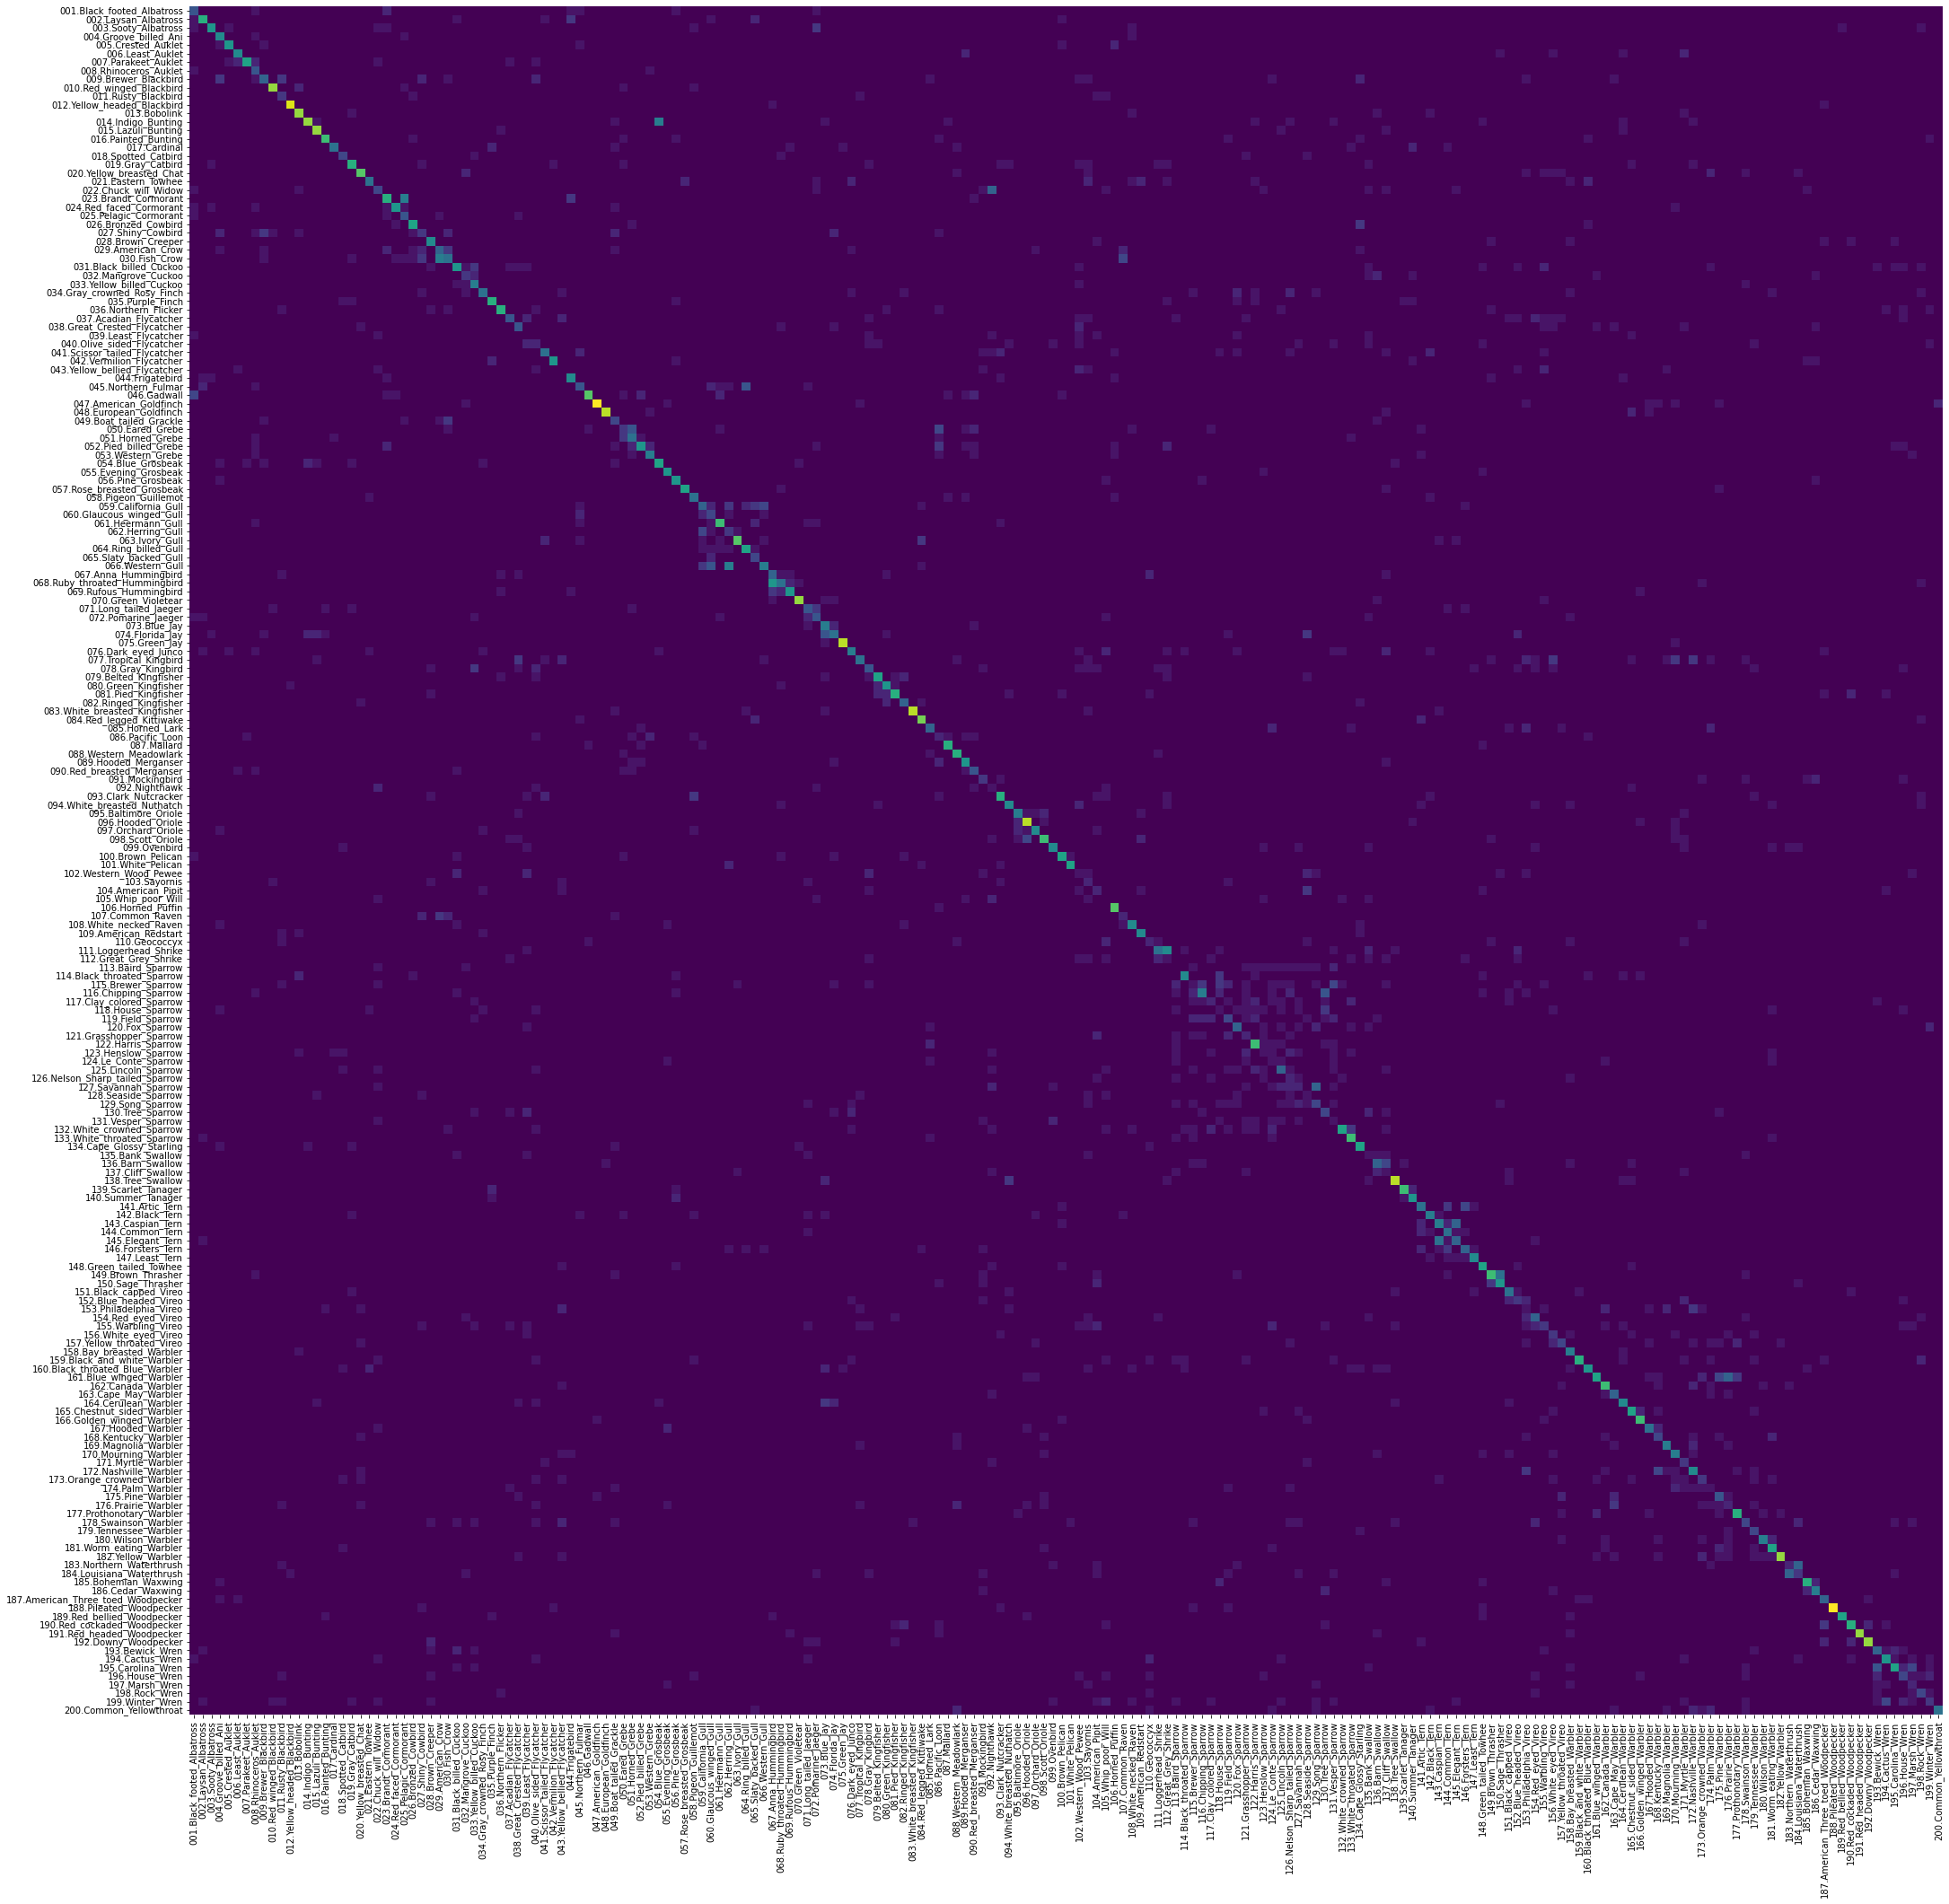

In [260]:
sns.heatmap(confusion_matrix(rf.predict(Xtest), ytest), cbar=None, cmap='viridis', xticklabels=birds, yticklabels=birds)
fig = plt.gcf()
fig.set_size_inches(35,35)

### Compare with simple tree and SVM models

In [261]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [262]:
svc = SVC()
tree = DecisionTreeClassifier()

In [263]:
svc.fit(Xtrain, ytrain)
tree.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [265]:
print(f'SVC score: {svc.score(Xtest, ytest)}') # SVC provides a better result
print(f'Decision Tree score: {tree.score(Xtest, ytest)}')

SVC score: 0.47497879558948264
Decision Tree score: 0.25388747526152106


In [266]:
from sklearn.model_selection import cross_val_score

In [267]:
scores = cross_val_score(svc, X, y, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.50 (+/- 0.03)


In [270]:
scores = cross_val_score(rf, X, y, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.46 (+/- 0.02)


In [271]:
scores = cross_val_score(tree, X, y, cv=5)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Accuracy: 0.27 (+/- 0.01)


In [272]:
import numpy as np

In [285]:
max_features = range(5, 50, 5)
n_estimators = range(10, 200, 20)
rf_params = np.empty((len(max_features)*len(n_estimators), 4), float)
i = 0
for max_features in range(5, 50, 5):
    for n_estimators in range(10, 200, 20):
        clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf, X,y, cv=5)
        rf_params[i, 0] = max_features
        rf_params[i, 1] = n_estimators
        rf_params[i, 2] = scores.mean()
        rf_params[i, 3] = scores.std()*2
        i += 1
        print('max_features: %d, n_estimators: %d, accuracy: %0.2f (+/- %0.2f)' % 
              (max_features, n_estimators, scores.mean(), scores.std()*2))

max_features: 5, n_estimators: 10, accuracy: 0.28 (+/- 0.02)
max_features: 5, n_estimators: 30, accuracy: 0.38 (+/- 0.01)
max_features: 5, n_estimators: 50, accuracy: 0.42 (+/- 0.01)
max_features: 5, n_estimators: 70, accuracy: 0.43 (+/- 0.02)
max_features: 5, n_estimators: 90, accuracy: 0.45 (+/- 0.02)
max_features: 5, n_estimators: 110, accuracy: 0.45 (+/- 0.02)
max_features: 5, n_estimators: 130, accuracy: 0.46 (+/- 0.02)
max_features: 5, n_estimators: 150, accuracy: 0.46 (+/- 0.02)
max_features: 5, n_estimators: 170, accuracy: 0.47 (+/- 0.02)
max_features: 5, n_estimators: 190, accuracy: 0.47 (+/- 0.02)
max_features: 10, n_estimators: 10, accuracy: 0.31 (+/- 0.01)
max_features: 10, n_estimators: 30, accuracy: 0.40 (+/- 0.02)
max_features: 10, n_estimators: 50, accuracy: 0.43 (+/- 0.02)
max_features: 10, n_estimators: 70, accuracy: 0.45 (+/- 0.02)
max_features: 10, n_estimators: 90, accuracy: 0.46 (+/- 0.02)
max_features: 10, n_estimators: 110, accuracy: 0.46 (+/- 0.02)
max_features

/var/folders/6h/5k5kd9fs35d2zrg3xjk3d2g80000gn/T/ipykernel_11946/2115738864.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


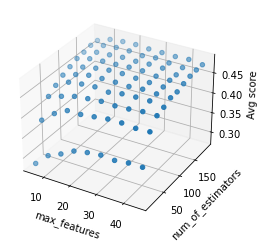

In [296]:
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = plt.gca(projection='3d')
X = rf_params[:,0]
Y = rf_params[:,1]
Z = rf_params[:,2]
ax.scatter(X, Y, Z)
ax.set_xlabel('max_features')
ax.set_ylabel('num_of_estimators')
ax.set_zlabel('Avg score')
plt.show();